# Set Up

In [18]:
#Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import hvplot.pandas


In [19]:
# Import data
path = os.path.join("Resources", "NA_sample_020.csv")
df = pd.read_csv(path)
df.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness
0,8037902,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive
1,8790126,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive
2,11647260,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive
3,11810796,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive
4,13183104,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive


## Create column with month and year

In [20]:
# Create new df with column with month and date
dates = pd.to_datetime(df["created_at"], infer_datetime_format=True)
df_month = df.loc[:, ["created_at", "lat", "lng", "sentiment", "topic", "stance", "gender", "aggressiveness"]]
df_month["created_at"] = dates
df_month['date'] = df_month['created_at'].dt.to_period('M')
df_month.head()

/Users/jennifershulyak/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date
0,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01
1,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03
2,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09
3,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10
4,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12


# Topics over Time

In [8]:
# Topics over time
df_topics = df_month.groupby(["date", "topic"])["created_at"].count()
df_topics

date     topic                           
2007-01  Weather Extremes                      2
2007-02  Global stance                         2
         Seriousness of Gas Emissions          1
         Weather Extremes                      1
2007-03  Global stance                         1
                                            ... 
2019-09  Undefined / One Word Hashtags        14
         Weather Extremes                    137
2019-10  Global stance                         8
         Importance of Human Intervantion      1
         Politics                              1
Name: created_at, Length: 1461, dtype: int64

# Looking at stance, agression, and sentiment over time

### Add columns to df to make it easy to see how factors change over time

In [ ]:
# Create new column for agressiveness factor
df_month["aggressiveness_factor"] = " "
df_month["stance_factor"] = " "

#Loop through df and change the ag factor to 0 1 depending on the agressiveness
for index, row in df_month.iterrows():
    if row["aggressiveness"] == "aggressive":
        row["aggressiveness_factor"] = 1
    else:
        row["aggressiveness_factor"] = 0 

    if row["stance"] == "believer":
        row["stance_factor"] = 1
    else:
        row["stance_factor"] = 0

df_month.head()


In [22]:
# Average Sentiment over Time

df_averages = df_month.groupby("date")["sentiment"].mean()
#df_averages = df_month.groupby("date")["sentiment", "aggressiveness_factor", "stance_factor"].mean()


### Plot average sentiment, agressiveness, and stances over time

<AxesSubplot:xlabel='date'>

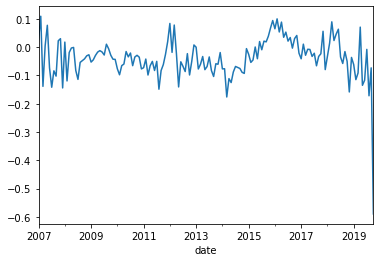

In [28]:
df_averages.plot()